In [1]:
# Connecting google colab with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the Iris_Flowers_data.csv
data = pd.read_csv('/content/drive/MyDrive/Datasets/Iris_Flower_Data.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# What are the different species of flowers
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
# Drop the 'Id' column from the data
data.drop(['Id'], axis = 1, inplace = True)

In [6]:
# Dividing the complete data frame into three separate data frames
data_s1 = data[data['Species'] == 'Iris-setosa']
data_s2 = data[data['Species'] == 'Iris-versicolor']
data_s3 = data[data['Species'] == 'Iris-virginica']

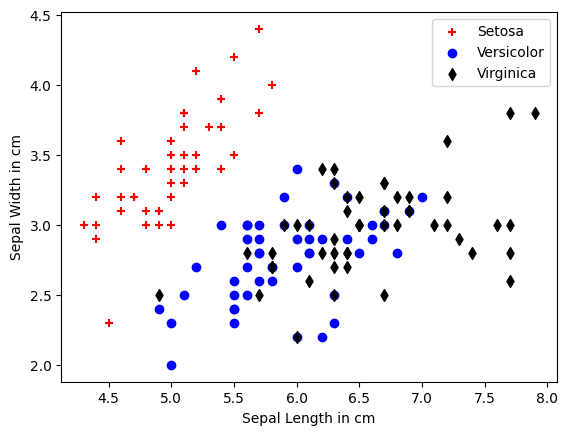

In [7]:
# Observing some graphical representation for understanding the separation visually for 'SepalLengthCm'	 and 'SepalWidthCm' across specices
plt.scatter(data_s1['SepalLengthCm'], data_s1['SepalWidthCm'], color = 'red', marker = '+')
plt.scatter(data_s2['SepalLengthCm'], data_s2['SepalWidthCm'], color = 'blue', marker = 'o')
plt.scatter(data_s3['SepalLengthCm'], data_s3['SepalWidthCm'], color = 'black', marker = 'd')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])
plt.show()

# Setosa and Versicolor can be visually separated
# Setosa and Virginica can be visually separated
# Virsiclor and Virginica can't be visually separated

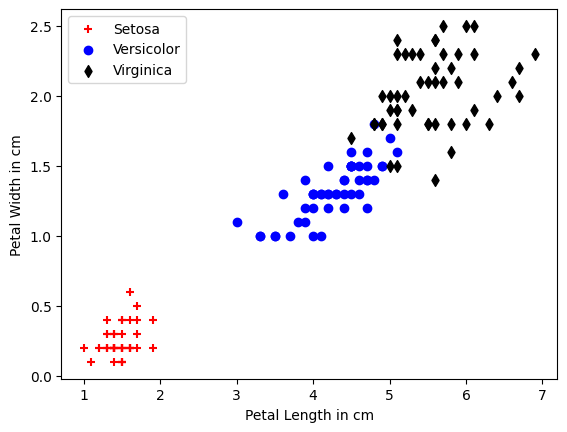

In [8]:
# Observing some graphical representation for understanding the separation visually for 'PetalLengthCm'	 and 'PetalWidthCm' across specices
plt.scatter(data_s1['PetalLengthCm'], data_s1['PetalWidthCm'], color = 'red', marker = '+')
plt.scatter(data_s2['PetalLengthCm'], data_s2['PetalWidthCm'], color = 'blue', marker = 'o')
plt.scatter(data_s3['PetalLengthCm'], data_s3['PetalWidthCm'], color = 'black', marker = 'd')
plt.xlabel('Petal Length in cm')
plt.ylabel('Petal Width in cm')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])
plt.show()

# Setosa and Versicolor can be visually separated
# Setosa and Virginica can be visually separated
# Virsiclor and Virginica can be visually separated

In [9]:
# Shuffle the original data to make the train test split meaningful
shuffled_data = shuffle(data)
shuffled_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
37,4.9,3.1,1.5,0.1,Iris-setosa
52,6.9,3.1,4.9,1.5,Iris-versicolor
142,5.8,2.7,5.1,1.9,Iris-virginica
50,7.0,3.2,4.7,1.4,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-setosa
...,...,...,...,...,...
106,4.9,2.5,4.5,1.7,Iris-virginica
93,5.0,2.3,3.3,1.0,Iris-versicolor
138,6.0,3.0,4.8,1.8,Iris-virginica
59,5.2,2.7,3.9,1.4,Iris-versicolor


In [10]:
# Convering the 'species' column into 0,1,2 form using label encoder
le = LabelEncoder()
shuffled_data['Species'] = le.fit_transform(shuffled_data['Species'])
shuffled_data.head(10)

# so, Iris-virginica is 2, Iris-versicolor is 1 and Iris-setosa is 0

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
37,4.9,3.1,1.5,0.1,0
52,6.9,3.1,4.9,1.5,1
142,5.8,2.7,5.1,1.9,2
50,7.0,3.2,4.7,1.4,1
9,4.9,3.1,1.5,0.1,0
104,6.5,3.0,5.8,2.2,2
94,5.6,2.7,4.2,1.3,1
86,6.7,3.1,4.7,1.5,1
15,5.7,4.4,1.5,0.4,0
77,6.7,3.0,5.0,1.7,1


In [12]:
# Separating the input (X) and output (y) variables
X = shuffled_data.drop(['Species'], axis = 1)
y = shuffled_data['Species']

In [13]:
# Train test splitting the daa set, considering test size as 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print('Shape of X_train is:', X_train.shape)
print('Shape of X_test is:', X_test.shape)
print('Shape of y_train is:', y_train.shape)
print('Shape of y_test is:', y_test.shape)

Shape of X_train is: (120, 4)
Shape of X_test is: (30, 4)
Shape of y_train is: (120,)
Shape of y_test is: (30,)


In [15]:
# Define the object for SVM classification
model = SVC()

In [19]:
# To check the documentation of the SVC() function
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [16]:
# Fit the training data X_train and y_train into the model
model.fit(X_train, y_train)

SVC()

In [17]:
# Predict the result of the model as y_pred
y_pred = model.predict(X_test)

In [18]:
# Calculate accuracy score of the model
print('Accuracy of the model is:', accuracy_score(y_test, y_pred))

Accuracy of the model is: 0.9666666666666667


#### If we increase the C value to 10 while define the object, the model evaluation score will decrease.